In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import skimage as ski

import skimage.io
import skimage.transform

import scipy.fftpack as spfft # for discrete cosine transform 

# link Gdrive if using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Original size:  (292, 228)
Rescaled size:  (53, 41)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Rescaled image')

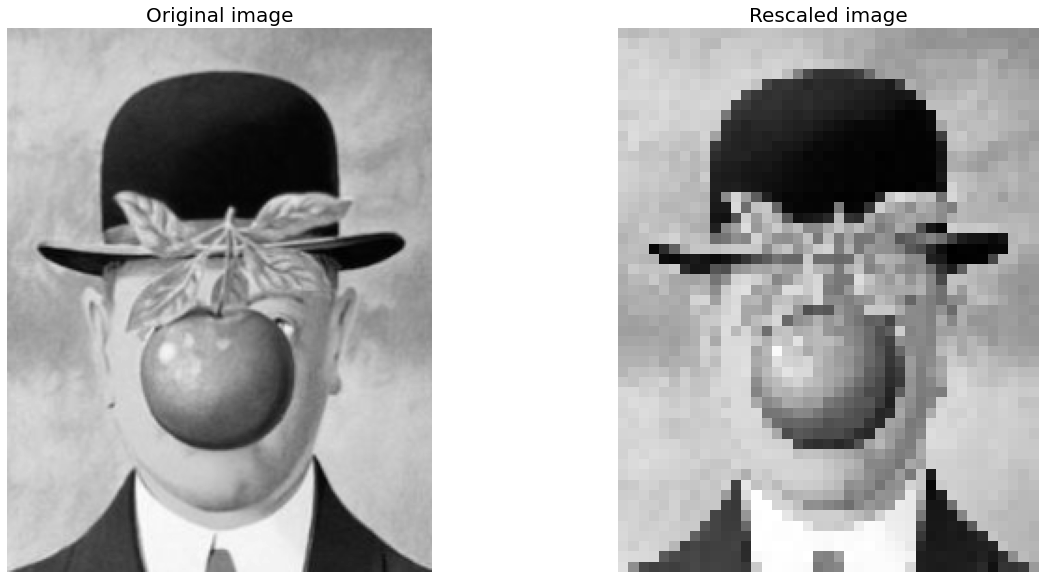

In [76]:
# import image and rescale 

img_path = '/content/drive/MyDrive/Colab Notebooks/SonOfMan.png'

# read image
img_og = ski.io.imread(img_path)

# convert to grayscale and visualize 
img_og = ski.color.rgb2gray(img_og)

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(img_og, cmap = 'gray')
ax[0].axis('off')
ax[0].set_title("Original image",fontsize=20)

print("Original size: ", img_og.shape)

# resize image 
img = ski.transform.rescale( img_og, 0.18, anti_aliasing=False)

print("Rescaled size: ", img.shape)

ax[1].imshow(img, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Rescaled image",fontsize=20)

In [ ]:
# constrauct forward and inverse DCT matrices 

# construct DCT matrix
def construct_DCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: D DCT matrix mapping image.flatten() to 
  #         DCT(image).flatten()

  Dx = spfft.dct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.dct(np.eye(Ny), axis = 0, norm='ortho')

  D = np.kron(Dy, Dx)

  return D

# construct inverse DCT matrix
def construct_iDCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: iD iDCT matrix mapping DCT(image).flatten() to 
  #         image.flatten()

  Dx = spfft.idct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.idct(np.eye(Ny), axis = 0, norm = 'ortho')

  D = np.kron(Dy, Dx)

  return D

In [36]:
Ny = 53
Nx = 41
N = Ny * Nx
DCT = construct_DCT_Mat(Nx,Ny)
iDCT = construct_iDCT_Mat(Nx,Ny)
F = img.flatten()
DCTF = np.dot(DCT,F)

Text(0.5, 1.0, 'DCT')

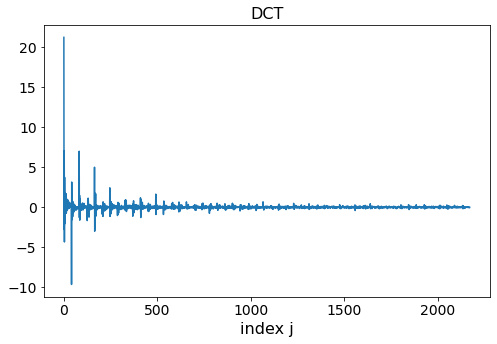

In [33]:
plt.figure(figsize=(8,5))
plt.plot(DCTF)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('index j',fontsize=16)
plt.title('DCT',fontsize=16)

Text(0.5, 1.0, 'Absolute Value of DCT')

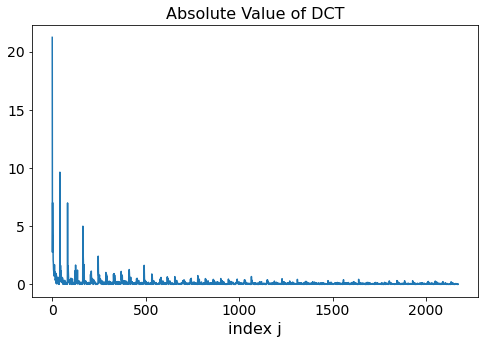

In [34]:
plt.figure(figsize=(8,5))
plt.plot(abs(DCTF))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('index j',fontsize=16)
plt.title('Absolute Value of DCT',fontsize=16)

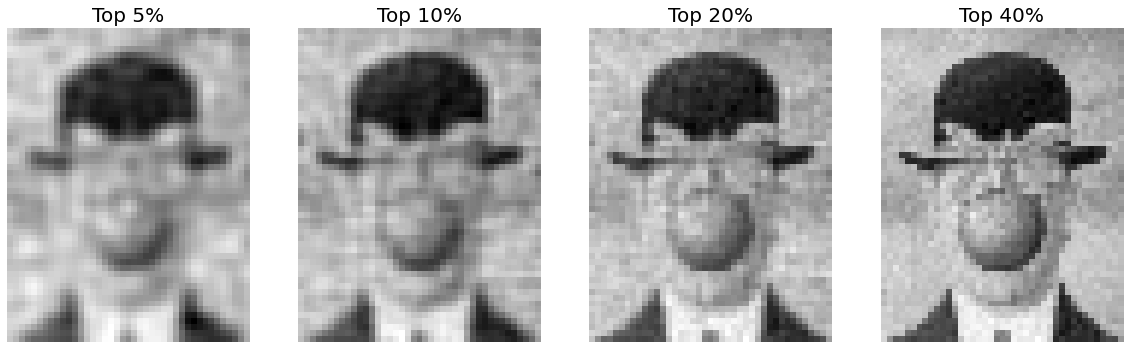

In [75]:
DCTF_abs = abs(DCTF)
DCTF_sorted = sorted(DCTF_abs,reverse=True)
fig, ax = plt.subplots(1, 4, figsize=(20,10))
top = [5,10,20,40]
for i in range(4):
  thh_idx = int(top[i]*0.01*N)
  rec_DCTF = np.zeros(N)
  for j in range(N):
    if DCTF_abs[j] > DCTF_sorted[thh_idx]:
      rec_DCTF[j] = DCTF[j]
  rec_F = np.dot(iDCT, rec_DCTF)
  img_re = np.reshape(rec_F, (Ny,Nx))
  ax[i].imshow(img_re, cmap = 'gray')
  ax[i].axis('off')
  ax[i].set_title("Top "+str(top[i])+"%",fontsize=20)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  4e+04  2e+01  2e+01  1e+00
 1:  1.3889e+01  2.5609e+01  5e+04  2e+01  2e+01  1e+01
 2: -7.7223e+01 -4.7642e+00  3e+02  2e+00  2e+00  7e+01
 3: -6.8420e+01 -2.8365e+00  3e+02  2e+00  2e+00  7e+01
 4: -5.5892e+01  1.2157e+01  3e+02  2e+00  2e+00  7e+01
 5: -1.7205e+00  1.1411e+01  3e+01  4e-01  3e-01  1e+01
 6:  7.1458e+00  1.1080e+01  1e+01  2e-01  1e-01  4e+00
 7:  9.9940e+00  1.1031e+01  4e+00  6e-02  5e-02  1e+00
 8:  1.0801e+01  1.0978e+01  2e+00  2e-02  2e-02  2e-01
 9:  1.0935e+01  1.0968e+01  5e-01  6e-03  5e-03  3e-02
10:  1.0953e+01  1.0959e+01  2e-01  2e-03  2e-03  6e-03
11:  1.0958e+01  1.0959e+01  8e-02  9e-04  8e-04  1e-03
12:  1.0957e+01  1.0957e+01  2e-02  2e-04  1e-04  1e-04
13:  1.0956e+01  1.0956e+01  2e-03  2e-05  2e-05  2e-05
14:  1.0956e+01  1.0956e+01  1e-04  1e-06  1e-06  8e-07
15:  1.0956e+01  1.0956e+01  5e-06  5e-08  4e-08  4e-08
Optimal solution found.
     pcost       dcost    

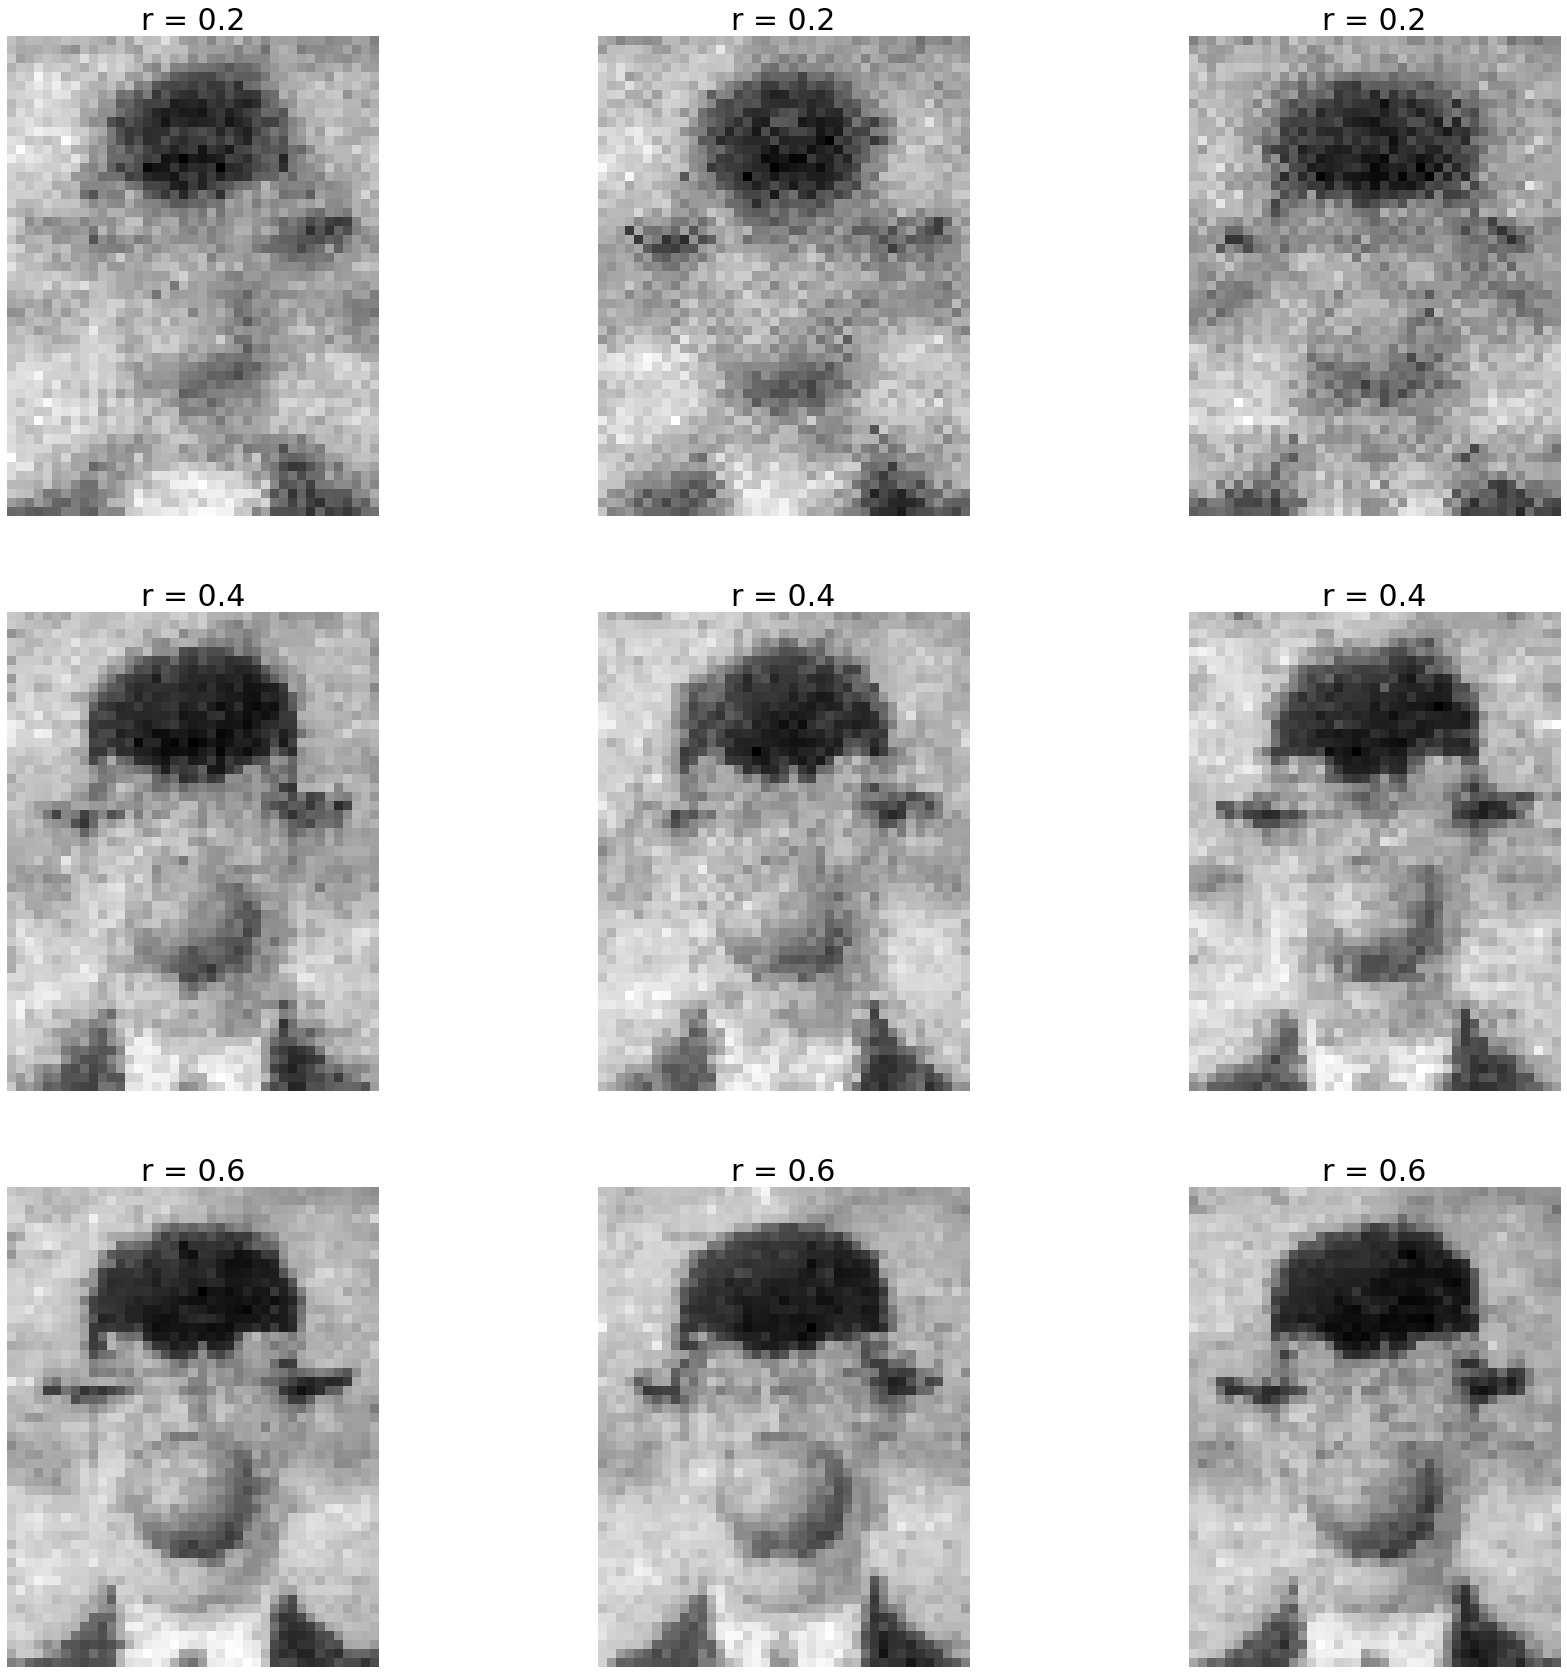

In [74]:
I = np.eye(N)
r = [0.2,0.4,0.6]
fig, ax = plt.subplots(3, 3, figsize=(30,30))
for i in range(3):
  M = int(r[i]*N)
  for j in range(3):
    B = np.random.permutation(I)
    B = B[0:M,:]

    y = np.dot(B,F)

    A = np.dot(B,iDCT)
    x = cvx.Variable(N)

    objective = cvx.Minimize(0.1*cvx.norm(x,1)+cvx.sum_squares(A@x-y))
    prob = cvx.Problem(objective)

    prob.solve(verbose=True, solver='CVXOPT',max_iter=1000,reltol=1e-2,featol=1e-2)
    x_star = x.value

    F_rcv = np.dot(iDCT, x_star)
    img_rcv = np.reshape(F_rcv, (Ny,Nx))

    ax[i][j].imshow(img_rcv, cmap = 'gray')
    ax[i][j].axis('off')
    ax[i][j].set_title("r = "+str(r[i]),fontsize=30)

In [72]:
UnknownImage_path = '/content/drive/MyDrive/Colab Notebooks/UnknownImage.npz'
UnknownImage = np.load(UnknownImage_path, allow_pickle=True)
B_un = UnknownImage['B']
y_un = UnknownImage['y']

Ny_un = 50
Nx_un = 50
N_un = Ny_un * Nx_un
DCT_un = construct_DCT_Mat(Nx_un,Ny_un)
iDCT_un = construct_iDCT_Mat(Nx_un,Ny_un)

A = np.dot(B_un,iDCT_un)
x = cvx.Variable(N_un)

objective = cvx.Minimize(0.1*cvx.norm(x,1)+cvx.sum_squares(A@x-y_un))
prob = cvx.Problem(objective)

prob.solve(verbose=True, solver='CVXOPT',max_iter=1000,reltol=1e-2,featol=1e-2)
x_star = x.value

F_rcv = np.dot(iDCT_un, x_star)
img_rcv = np.reshape(F_rcv, (Ny_un,Nx_un))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+04  5e-01  2e+01  1e+00
 1: -2.6549e+01 -2.5882e+01  5e+04  4e-01  2e+01  2e+00
 2:  2.7474e+01  3.6833e+01  1e+05  6e-01  2e+01  1e+01
 3: -1.0818e+02  2.9367e+01  4e+03  1e-01  5e+00  1e+02
 4: -4.5608e+01  2.2028e+01  1e+02  2e-02  8e-01  7e+01
 5:  1.9417e+01  2.8418e+01  2e+01  3e-03  1e-01  9e+00
 6:  2.6714e+01  2.9911e+01  1e+01  2e-03  7e-02  3e+00
 7:  3.0365e+01  3.1377e+01  4e+00  6e-04  2e-02  1e+00
 8:  3.1446e+01  3.1807e+01  2e+00  3e-04  1e-02  4e-01
 9:  3.1858e+01  3.1992e+01  7e-01  1e-04  4e-03  1e-01
10:  3.2051e+01  3.2085e+01  3e-01  4e-05  1e-03  3e-02
11:  3.2107e+01  3.2117e+01  1e-01  1e-05  5e-04  1e-02
12:  3.2127e+01  3.2130e+01  4e-02  5e-06  2e-04  3e-03
13:  3.2134e+01  3.2135e+01  1e-02  2e-06  7e-05  9e-04
14:  3.2137e+01  3.2137e+01  4e-03  6e-07  2e-05  2e-04
15:  3.2138e+01  3.2138e+01  1e-03  1e-07  5e-06  4e-05
16:  3.2138e+01  3.2138e+01  2e-04  2e-08  9e-07  

Text(0.5, 1.0, 'Reconstructed Image')

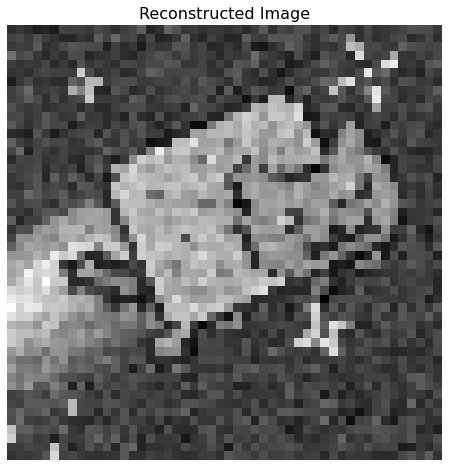

In [73]:
plt.figure(figsize=(8,8))
plt.imshow(img_rcv, cmap = 'gray')
plt.axis('off')
plt.title('Reconstructed Image',fontsize=16)